In [1]:
import json
import numpy
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Metadata EDA

#### Captions

In [2]:
captions_train_path = "/mnt/muthderd/MIDS/W210/data/annotations_trainval2017/annotations/captions_val2017.json"
captions_train  = json.loads(open(captions_train_path).read())

In [3]:
captions_train.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [4]:
captions_train['info']

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [5]:
captions_train['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
  'id': 2,
  'name': 'Attribution-NonCommercial License'},
 {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
  'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License'},
 {'url': 'http://creativecommons.org/licenses/by/2.0/',
  'id': 4,
  'name': 'Attribution License'},
 {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
  'id': 5,
  'name': 'Attribution-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
  'id': 6,
  'name': 'Attribution-NoDerivs License'},
 {'url': 'http://flickr.com/commons/usage/',
  'id': 7,
  'name': 'No known copyright restrictions'},
 {'url': 'http://www.usa.gov/copyright.shtml',
  'id': 8,
  'name': 'United States Government Work'}]

In [6]:
captions_train['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [7]:
captions_train['annotations'][0]

{'image_id': 179765,
 'id': 38,
 'caption': 'A black Honda motorcycle parked in front of a garage.'}

#### Instances
##### Categories

In [8]:
inst_train_path = "/mnt/muthderd/MIDS/W210/data/annotations_trainval2017/annotations/instances_val2017.json"
inst_train  = json.loads(open(inst_train_path).read())

In [9]:
inst_train.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [10]:
inst_train['info']

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [11]:
inst_train['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
  'id': 2,
  'name': 'Attribution-NonCommercial License'},
 {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
  'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License'},
 {'url': 'http://creativecommons.org/licenses/by/2.0/',
  'id': 4,
  'name': 'Attribution License'},
 {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
  'id': 5,
  'name': 'Attribution-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
  'id': 6,
  'name': 'Attribution-NoDerivs License'},
 {'url': 'http://flickr.com/commons/usage/',
  'id': 7,
  'name': 'No known copyright restrictions'},
 {'url': 'http://www.usa.gov/copyright.shtml',
  'id': 8,
  'name': 'United States Government Work'}]

In [12]:
inst_train['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [13]:
inst_train['annotations'][0]

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [14]:
inst_train['annotations'][0]['category_id']

18

In [15]:
inst_train['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

## Pandas for Image Metadata

In [16]:
inst_train['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [17]:
image_df = pd.DataFrame(inst_train['images'])

In [18]:
image_df.head()

,coco_url,date_captured,file_name,flickr_url,height,id,license,width
0,http://images.cocodataset.org/val2017/00000039...,2013-11-14 17:02:52,000000397133.jpg,http://farm7.staticflickr.com/6116/6255196340_...,427,397133,4,640
1,http://images.cocodataset.org/val2017/00000003...,2013-11-14 20:55:31,000000037777.jpg,http://farm9.staticflickr.com/8429/7839199426_...,230,37777,1,352
2,http://images.cocodataset.org/val2017/00000025...,2013-11-14 22:32:02,000000252219.jpg,http://farm4.staticflickr.com/3446/3232237447_...,428,252219,4,640
3,http://images.cocodataset.org/val2017/00000008...,2013-11-14 23:11:37,000000087038.jpg,http://farm8.staticflickr.com/7355/8825114508_...,480,87038,1,640
4,http://images.cocodataset.org/val2017/00000017...,2013-11-14 23:16:55,000000174482.jpg,http://farm8.staticflickr.com/7020/6478877255_...,388,174482,6,640


In [19]:
image_df.describe()

,height,id,license,width
count,5000.000000,5000.000000,5000.00000,5000.000000
mean,483.543000,289562.336600,2.79140,573.754800
std,98.765315,167613.417537,1.48038,94.003704
min,145.000000,139.000000,1.00000,200.000000
25%,426.000000,147728.000000,1.00000,500.000000
50%,480.000000,289590.000000,3.00000,640.000000
75%,517.750000,435205.250000,4.00000,640.000000
max,640.000000,581781.000000,7.00000,640.000000


In [20]:
len(image_df)

5000

## Counts / Integrity Checks

In [21]:
len(pd.Series(image_df['file_name']).unique())

5000

In [22]:
len(pd.Series(image_df['flickr_url']).unique())

5000

In [23]:
len(pd.Series(image_df['id']).unique())

5000

In [24]:
len(pd.Series(image_df['license']).unique())

7

In [25]:
len(pd.Series(image_df['coco_url']).unique())

5000

In [26]:
len(pd.Series(image_df['date_captured']).unique())
#is the fact that there are duplicate dates worth investigating?
#are these missing dates?

4986

In [27]:
len(pd.Series(image_df['height']).unique())

302

In [28]:
len(pd.Series(image_df['width']).unique())

221

## License Distribution

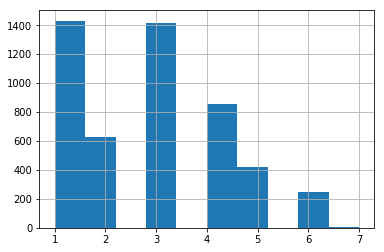

In [29]:
image_df['license'].hist()

## Image Size Distribution

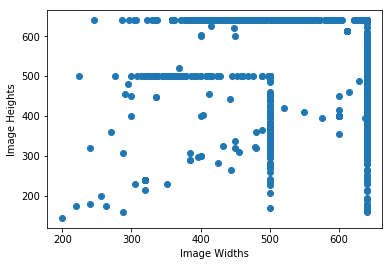

In [30]:
plt.scatter(image_df['width'], image_df['height'])
plt.ylabel('Image Heights')
plt.xlabel('Image Widths')
plt.show()

### Distribution of Aspect Ratio

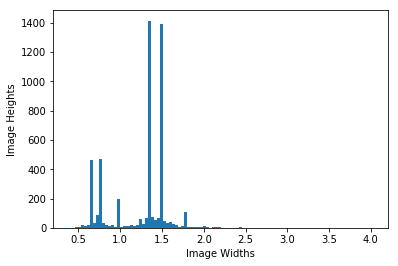

In [31]:
plt.hist(np.divide(image_df['width'],image_df['height']), bins=100)
plt.ylabel('Image Heights')
plt.xlabel('Image Widths')
plt.show()

- Lots of images at a weird aspect ratio.  Might want to check that there is no distortion for these images.

### Distribution of Widths

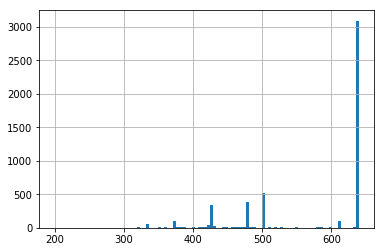

In [32]:
image_df['width'].hist(bins=100)

### Distribution of Image Heights

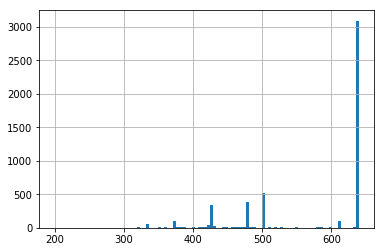

In [33]:
image_df['width'].hist(bins=100)

## Annotation Counts

In [34]:
from collections import defaultdict

cat_ids = defaultdict(int)

In [35]:
electronics = 0
tv = 0 # id:72
laptop = 0 # id: 73
mouse = 0 # id: 74
remote = 0 # id: remote
keyboard = 0 # id: 76
cell = 0 # id: 77

for annotation in inst_train['annotations']:
    cat_id = annotation['category_id']
    
    cat_ids[str(cat_id)] += 1


In [36]:
tvs = cat_ids['72']
print ("TVs: " + str(tvs))

laptops = cat_ids['73']
print ("Laptops: " + str(laptops))

mouses = cat_ids['74']
print ("Mousess: " + str(mouses))

remotes = cat_ids['75']
print ("Remotess: " + str(remotes))

keyboards = cat_ids['76']
print ("Keyboards: " + str(keyboards))

cells  = cat_ids['77']
print ("Cell Phones: " + str(cells))

electronics = tvs + laptops + mouses + remotes + keyboards + cells
print ("Total eletronics: " + str(electronics))

TVs: 288
Laptops: 231
Mousess: 106
Remotess: 283
Keyboards: 153
Cell Phones: 262
Total eletronics: 1323


## Pandas for Annotation
### Annotation Counts

In [37]:
#annotation_df = pd.DataFrame(dict(cat_ids), index=dict(cat_ids).keys())

In [38]:
annotation_counts = pd.Series(cat_ids)

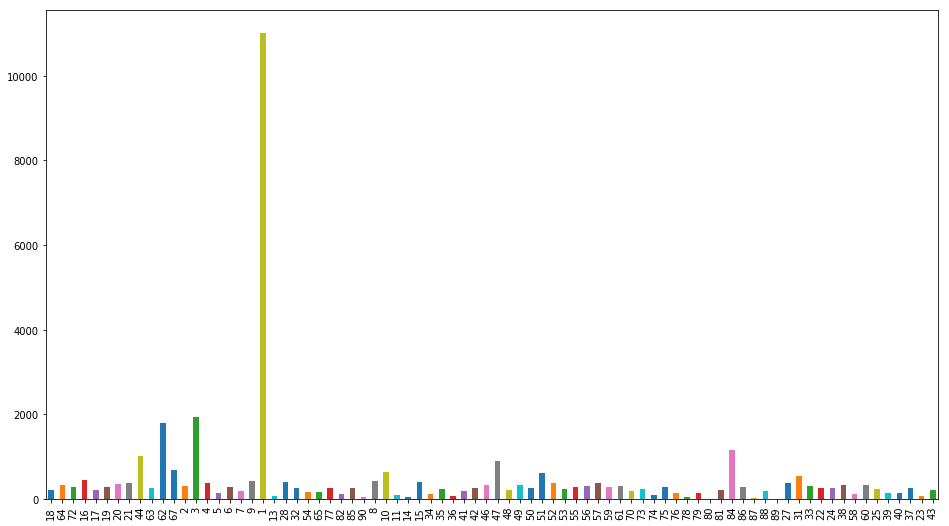

In [39]:
annotation_counts.plot.bar(figsize=(16,9))

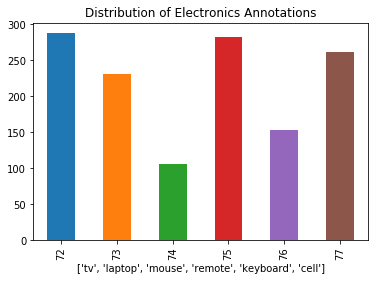

In [40]:
electronics_names = ['tv','laptop','mouse','remote','keyboard','cell']
electronics_ids = ['72', '73', '74', '75', '76', '77']
annotation_counts[electronics_ids].plot.bar()
plt.title("Distribution of Electronics Annotations")
plt.xlabel(electronics_names)
plt.show()

### Other Annotation EDA

In [41]:
annotation_df = pd.DataFrame(inst_train['annotations'])

In [42]:
annotation_df.head()

,area,bbox,category_id,id,image_id,iscrowd,segmentation
0,702.10575,"[473.07, 395.93, 38.65, 28.67]",18,1768,289343,0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416...."
1,27718.47630,"[272.1, 200.23, 151.97, 279.77]",18,1773,61471,0,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427...."
2,78969.31690,"[124.71, 196.18, 372.85, 356.81]",18,2551,472375,0,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347...."
3,108316.66515,"[112.71, 154.82, 367.29, 479.35]",18,3186,520301,0,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6..."
4,75864.53530,"[200.61, 89.65, 400.22, 251.02]",18,3419,579321,0,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336...."


In [43]:
annotation_df.describe()

,area,category_id,id,image_id,iscrowd
count,36781.000000,36781.000000,3.678100e+04,36781.000000,36781.000000
mean,11979.108476,29.914847,1.094137e+10,288668.543623,0.012126
std,29416.673999,28.551477,9.874851e+10,166597.296736,0.109449
min,1.000450,1.000000,2.830000e+02,139.000000,0.000000
25%,377.362950,1.000000,4.499100e+05,147725.000000,0.000000
50%,1681.000000,22.000000,1.239569e+06,289741.000000,0.000000
75%,8647.652050,55.000000,1.724596e+06,433515.000000,0.000000
max,393093.964200,90.000000,9.088005e+11,581781.000000,1.000000


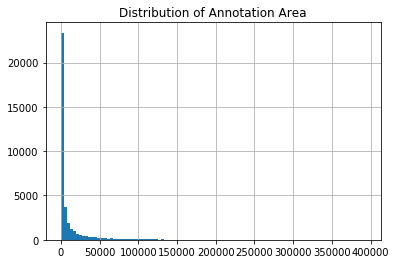

In [44]:
annotation_df['area'].hist(bins=100)
plt.title("Distribution of Annotation Area")
plt.show()

### Merging Annotations with Image Metadata

In [45]:
#the 'id' in image_df needs to be changed to 'image_id' in order to join with annotations_df
renamed_image_df = image_df.copy(deep=True)
renamed_image_df.rename(columns={'id':'image_id'}, inplace=True)

In [46]:
renamed_image_df.head()

,coco_url,date_captured,file_name,flickr_url,height,image_id,license,width
0,http://images.cocodataset.org/val2017/00000039...,2013-11-14 17:02:52,000000397133.jpg,http://farm7.staticflickr.com/6116/6255196340_...,427,397133,4,640
1,http://images.cocodataset.org/val2017/00000003...,2013-11-14 20:55:31,000000037777.jpg,http://farm9.staticflickr.com/8429/7839199426_...,230,37777,1,352
2,http://images.cocodataset.org/val2017/00000025...,2013-11-14 22:32:02,000000252219.jpg,http://farm4.staticflickr.com/3446/3232237447_...,428,252219,4,640
3,http://images.cocodataset.org/val2017/00000008...,2013-11-14 23:11:37,000000087038.jpg,http://farm8.staticflickr.com/7355/8825114508_...,480,87038,1,640
4,http://images.cocodataset.org/val2017/00000017...,2013-11-14 23:16:55,000000174482.jpg,http://farm8.staticflickr.com/7020/6478877255_...,388,174482,6,640


In [47]:
sorted_image_ids_from_image = pd.Series(renamed_image_df['image_id']).sort_values().reset_index(drop=True)
sorted_image_ids_from_anno = pd.Series(pd.Series(annotation_df['image_id']).unique()).sort_values().reset_index(drop=True)

In [48]:
sorted_image_ids_from_image.equals(sorted_image_ids_from_anno)

False

In [49]:
sorted_image_ids_from_image.tail()

4995    581317
4996    581357
4997    581482
4998    581615
4999    581781
Name: image_id, dtype: int64

In [50]:
sorted_image_ids_from_anno.tail()

4947    581317
4948    581357
4949    581482
4950    581615
4951    581781
dtype: int64

- Looks like not every image has annotations.

In [51]:
images_and_annotations_df = annotation_df.merge(renamed_image_df,on='image_id', how='left')

In [52]:
images_and_annotations_df.head()

,area,bbox,category_id,id,image_id,iscrowd,segmentation,coco_url,date_captured,file_name,flickr_url,height,license,width
0,702.10575,"[473.07, 395.93, 38.65, 28.67]",18,1768,289343,0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",http://images.cocodataset.org/val2017/00000028...,2013-11-15 00:35:14,000000289343.jpg,http://farm5.staticflickr.com/4029/4669549715_...,640,2,529
1,27718.47630,"[272.1, 200.23, 151.97, 279.77]",18,1773,61471,0,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",http://images.cocodataset.org/val2017/00000006...,2013-11-15 01:18:25,000000061471.jpg,http://farm1.staticflickr.com/11/12252917_d009...,480,1,640
2,78969.31690,"[124.71, 196.18, 372.85, 356.81]",18,2551,472375,0,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",http://images.cocodataset.org/val2017/00000047...,2013-11-15 12:52:52,000000472375.jpg,http://farm6.staticflickr.com/5333/8941457326_...,612,3,612
3,108316.66515,"[112.71, 154.82, 367.29, 479.35]",18,3186,520301,0,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",http://images.cocodataset.org/val2017/00000052...,2013-11-15 07:45:44,000000520301.jpg,http://farm3.staticflickr.com/2556/4134376909_...,640,3,480
4,75864.53530,"[200.61, 89.65, 400.22, 251.02]",18,3419,579321,0,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",http://images.cocodataset.org/val2017/00000057...,2013-11-14 17:38:30,000000579321.jpg,http://farm5.staticflickr.com/4114/4737904204_...,498,5,640


In [53]:
images_and_annotations_df.describe()

,area,category_id,id,image_id,iscrowd,height,license,width
count,36781.000000,36781.000000,3.678100e+04,36781.000000,36781.000000,36781.000000,36781.000000,36781.000000
mean,11979.108476,29.914847,1.094137e+10,288668.543623,0.012126,475.939915,2.789592,584.324597
std,29416.673999,28.551477,9.874851e+10,166597.296736,0.109449,93.882787,1.480714,88.026946
min,1.000450,1.000000,2.830000e+02,139.000000,0.000000,145.000000,1.000000,200.000000
25%,377.362950,1.000000,4.499100e+05,147725.000000,0.000000,426.000000,1.000000,500.000000
50%,1681.000000,22.000000,1.239569e+06,289741.000000,0.000000,480.000000,3.000000,640.000000
75%,8647.652050,55.000000,1.724596e+06,433515.000000,0.000000,500.000000,4.000000,640.000000
max,393093.964200,90.000000,9.088005e+11,581781.000000,1.000000,640.000000,7.000000,640.000000


### Distribution of Annotations per Image

### Select the entries for electronics only:

In [54]:
electronics_only_merged_df = images_and_annotations_df.loc[(images_and_annotations_df['category_id'] >= 72) & (images_and_annotations_df['category_id'] <= 77)]

In [55]:
electronics_only_merged_df.describe()

,area,category_id,id,image_id,iscrowd,height,license,width
count,1323.000000,1323.000000,1.323000e+03,1323.000000,1323.0,1323.000000,1323.000000,1323.000000
mean,12748.312920,74.429327,1.111126e+06,292781.323507,0.0,459.445200,2.810280,587.922902
std,26644.342120,1.822731,6.773934e+05,170926.585920,0.0,80.704879,1.499718,83.725237
min,3.453100,72.000000,2.822400e+04,139.000000,0.0,169.000000,1.000000,240.000000
25%,413.949125,73.000000,3.277755e+05,149222.000000,0.0,425.000000,1.000000,500.000000
50%,2247.999550,75.000000,1.109441e+06,316015.000000,0.0,479.000000,3.000000,640.000000
75%,13195.127450,76.000000,1.634121e+06,435208.000000,0.0,480.000000,4.000000,640.000000
max,273069.516600,77.000000,2.231612e+06,581317.000000,0.0,640.000000,6.000000,640.000000


- All the image ids in 'electronics_only_merged_df' are the ones with electronics

### Distribution of Annotations per Image for Electronics Only

## Image EDA

In [56]:
path = "/home/muthderd/MIDS/W210/data/train2017/000000000030.jpg"

In [57]:
img = Image.open(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/muthderd/MIDS/W210/data/train2017/000000000030.jpg'

In [ ]:
img.show()

In [ ]:
width, height = img.size
print(width, height)

In [ ]:
len(img.histogram())

In [ ]:
pixel_vals = [value for value in range(1,len(img.histogram())+1)]

In [ ]:
plt.bar(pixel_vals, img.histogram())
plt.title("Distribution of RGB Values for Training Pic 30")
plt.ylabel('Count')
plt.xlabel('RGB Value')
plt.show()

In [ ]:
##my guess is that the 3 peaks represent red, white, and green

In [ ]:
#select all images that contain electronics
all_images_with_electronics = list(pd.Series(electronics_only_merged_df['image_id']).unique())

In [ ]:
len(all_images_with_electronics)

In [ ]:
all_images_with_electronics[0]

### Do all the training filenames have the same string length?

In [ ]:
training_folder_name = '/home/muthderd/MIDS/W210/data/train2017/'
all_training_filenames = os.listdir(training_folder_name)

In [ ]:
len(all_training_filenames[0])

In [ ]:
max_file_id_length = len(all_training_filenames[0]) - 4#subtract 4 for the '.jpg' suffix

In [ ]:
wrong_length = 0
for filename in all_training_filenames:
    if len(filename) != 16:
        wrong_length += 1
        
print(wrong_length)

- All filenames in train2017 have the same length.

In [ ]:
all_training_filenames[0]

In [ ]:
all_training_filenames[0][:12]

In [ ]:
files_to_open = []
for image_id in all_images_with_electronics:
    file_id = str(image_id)
    zeros_to_add = max_file_id_length-len(file_id)
    filename = ('0'*zeros_to_add) + file_id + '.jpg'
    files_to_open.append(filename)

In [ ]:
summed_rgb_vals_768 = np.array([0]*768)
total_768 = 0
summed_rgb_vals_256 = np.array([0]*256)
total_256 = 0
total_other = 0
for filename in files_to_open:
    path = training_folder_name+filename
    with Image.open(path) as image:
        rgb_counts = image.histogram()
        #width, height = image.size #actual width and height can be checked for data integrity
        if len(rgb_counts) == 768:
            summed_rgb_vals_768 = np.add(np.array(rgb_counts), summed_rgb_vals_768)
            total_768 += 1
        elif len(rgb_counts) == 256:
            summed_rgb_vals_256 = np.add(np.array(rgb_counts), summed_rgb_vals_256)
            total_256 += 1
        else:
            total_other += 1

In [ ]:
#img.show()

In [ ]:
len(img.histogram())

In [ ]:
total_768

In [ ]:
total_256

In [ ]:
total_other

In [ ]:
pixel_vals = [value for value in range(1,len(img.histogram())+1)]

In [ ]:
plt.bar(pixel_vals, summed_rgb_vals_768)
plt.title("Distribution of RGB Values (n=768) for Images with Electronics")
plt.ylabel('Count')
plt.xlabel('RGB Value')
plt.show()

- Definitely a pattern in the distribution of RGB values.

In [ ]:
plt.bar(pixel_vals, summed_rgb_vals_256)
plt.title("Distribution of RGB Values (n=256) for Images with Electronics")
plt.ylabel('Count')
plt.xlabel('RGB Value')
plt.show()

# Questions
- Is the class imbalance a problem?
  - Relatively fewer keyboard and mouse annotations
- What does the license mean for us?
- How is the distribution of dates?
  - is the fact that there are duplicate dates worth investigating?
  - are these missing dates?
- How is the distribution of color?
  - definitely want histograms of all RGB counts by class and for whole dataset
  - complicated to do it by class, since some images will have multiple classes
- Why do some images have such an abnormal aspect ratio?
  - could be worthwhile to check these for distortion or other quality issues.
- What is the distribution of bbox sizes and segmentations?
- What is the significance of the area?
- Is it really the case the not every image has annotations?
  - The images whose IDs don't appear in the annotations should be checked to confirm.
- Distribution of annotations per image can be investigated
  - Includes counts of other objects in images with electronics
- There is definitely a pattern in the distribution of RGB values for images with electronics.
  - Is there a difference by class?
  - Do non-electronics share this pattern?
- There are 3 images with a color range of only 256
  - Which images are those and is this a problem?
  - Would fixing this simply be a matter of multiplying each RGB value by 3?
- Data Integrity Checks
  - image resolution of actual files vs metadata